In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
PI2 = 2 * np.pi

In [2]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    return M

In [3]:
def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps

In [4]:
# 1-(a)
x1=[1,0,0,0,0,0,0,0]
dft(x1)

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [5]:
# 1-(b)
x2=[1,1,1,1,1,1,1,1]
dft(x2)

array([ 8.00000000e+00+0.00000000e+00j, -5.55111512e-16+2.22044605e-16j,
       -4.28626380e-16-4.44089210e-16j, -2.22044605e-16+8.88178420e-16j,
        0.00000000e+00-4.89858720e-16j, -2.10942375e-15-1.22124533e-15j,
       -2.93296835e-15-6.66133815e-16j,  3.55271368e-15+1.11022302e-15j])

In [6]:
# 1-(c)
x3=[1,-1,1,-1,1,-1,1,-1]
dft(x3)

array([ 0.00000000e+00+0.00000000e+00j,  1.11022302e-16-1.11022302e-16j,
        9.55594723e-17-1.11022302e-16j,  8.88178420e-16-1.55431223e-15j,
        8.00000000e+00+3.42901104e-15j, -2.66453526e-15+1.11022302e-16j,
        2.93296835e-15-6.66133815e-16j, -5.21804822e-15-2.66453526e-15j])

In [7]:
# 1-(d)
x4=[3,0,2,0,2,0,2,0]
dft(x4)

array([9.+0.00000000e+00j, 1.-4.44089210e-16j, 1.-4.89858720e-16j,
       1.-6.66133815e-16j, 9.+2.93915232e-15j, 1.-1.33226763e-15j,
       1.-1.46957616e-15j, 1.-1.77635684e-15j])

In [8]:
# 1-(g)
x7=[1,1,0,0]
dft(x7)

array([2.+0.0000000e+00j, 1.-1.0000000e+00j, 0.-1.2246468e-16j,
       1.+1.0000000e+00j])

In [9]:
# 1-(g)
x8=[1,1,0,0,0,0,0,0]
dft(x8)

array([2.        +0.00000000e+00j, 1.70710678-7.07106781e-01j,
       1.        -1.00000000e+00j, 0.29289322-7.07106781e-01j,
       0.        -1.22464680e-16j, 0.29289322+7.07106781e-01j,
       1.        +1.00000000e+00j, 1.70710678+7.07106781e-01j])

In [10]:
# 2-(b)-1

m= np.arange(4).reshape(1,-1)
n= np.arange(4).reshape(-1,1)

x= np.array([1,1,1,1])
w= np.array([1,1])
x=np.concatenate((x,np.zeros(3)))
w=np.concatenate((w,np.zeros(3)))

h1= (x[m]*w[n-m]).sum(axis=1)
h1

array([1., 2., 2., 2.])

In [11]:
# 2-(b)-2
x= np.array([1,1,1,1])
w= np.array([1,1])
np.convolve(x,w)

array([1, 2, 2, 2, 1])

In [12]:
# 2-(c)
xn=[1,1,1,1]
dft(xn)

array([ 4.00000000e+00+0.00000000e+00j, -1.83697020e-16-2.22044605e-16j,
        0.00000000e+00-2.44929360e-16j,  3.29046455e-16-3.33066907e-16j])

In [13]:
# 2-(c)
wn=[1,1]
dft(wn)

array([2.+0.0000000e+00j, 0.-1.2246468e-16j])

In [14]:
# 2-(c)
yn=[1,2,2,2]
dft(yn)

array([ 7.+0.00000000e+00j, -1.-4.44089210e-16j, -1.-4.89858720e-16j,
       -1.-6.66133815e-16j])

In [15]:
# 2-(c)

np.fft.ifft(np.fft.fft(xn)*np.fft.fft(yn))

array([7.+0.j, 7.+0.j, 7.+0.j, 7.+0.j])

In [16]:
import pandas as pd

df = pd.read_csv('FB.csv', header=0, parse_dates=[0])
len(df)

896

In [17]:
from thinkdsp import Wave

ys = df['Close']

# for these examples, we need the wave to have 
# an even number of samples
if len(ys) % 2:
    ys = ys[:-1]

close = Wave(ys, framerate=1)
len(close)

896

In [18]:
from thinkdsp import zero_pad

def make_filter(window, wave):

    padded = zero_pad(window, len(wave))
    window_wave = Wave(padded, framerate=wave.framerate)
    window_spectrum = window_wave.make_spectrum()
    return window_spectrum

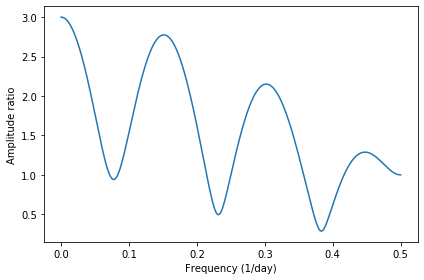

In [19]:
diff_window = np.array([1,1,0,0,0,0,0,1])
diff_filter = make_filter(diff_window, close)
diff_filter.plot()
decorate(xlabel='Frequency (1/day)', ylabel='Amplitude ratio')